In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load
import datetime
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
# Load Inputs
# Load X and y values
X = load('X.joblib') 
y= load('y.joblib')

X


,0,1,2,3,4,5,6,7
1980-01-01 09:00:00,-151.803446,-4.064469,-0.709943,-1.704749,-33.468375,14.908108,-1.219917,-0.125832
1980-01-02 09:00:00,-151.844542,-1.727495,9.293493,-1.611327,-38.473908,7.829461,-1.512209,0.515683
1980-01-03 09:00:00,-152.029096,-6.590885,11.797603,-1.290181,-21.173405,-2.099535,-1.533574,0.727990
1980-01-04 09:00:00,-152.365818,-3.041019,9.825014,-1.350949,5.973481,-11.542335,-1.431413,1.267298
1980-01-05 09:00:00,-152.596186,-2.287107,3.897496,-1.649611,-1.177278,-12.862747,-1.304209,1.576376
...,...,...,...,...,...,...,...,...
2018-12-27 09:00:00,-152.356585,-6.189951,-15.593767,-2.078616,-15.912171,11.503087,-0.082453,0.904932
2018-12-28 09:00:00,-152.377714,-2.942925,-22.232640,-1.605875,27.278408,5.756574,-0.028856,1.962011
2018-12-29 09:00:00,-152.615024,-1.262835,-21.464061,-2.027109,21.319440,-3.560168,0.034292,2.274896
2018-12-30 09:00:00,-152.634561,-4.771283,-19.532871,-2.785987,7.737331,-9.083744,0.131938,2.339727


In [3]:
X_train,X_test,y_train,y_test= train_test_split(X ,y,test_size=0.20, random_state=0)

Coefficient of determination of base LR model on test data is , 0.5300325404572916
[-0.07348915 -0.02646119  0.00954769 -0.09680732  0.00232238  0.00206517
  0.00357417 -0.00239102]
0.7288095808107443
0.7212927067636374


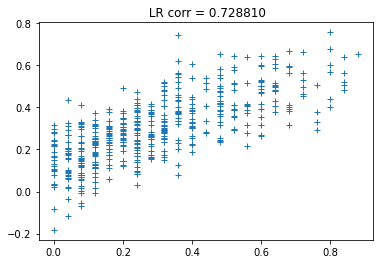

In [7]:
#regLin=SVR(C=30,gamma='scale',kernel='rbf',epsilon=0.01).fit(X_train, y_train)
regLin=LinearRegression().fit(X_train, y_train)
acc_svr       =regLin.score(X_test, y_test) 
print("Coefficient of determination of base LR model on test data is ,",(acc_svr))
yy_test = regLin.predict(X_test)
test_corr = np.corrcoef(yy_test,y_test)[0,1]
plt.title(' LR corr = %f'%test_corr)
plt.plot(y_test,yy_test,'+')

print(regLin.coef_)
print(np.corrcoef(yy_test,y_test)[0,1])
yy_train=regLin.predict(X_train)
print(np.corrcoef(yy_train,y_train)[0,1])

In [8]:
yLR=regLin.predict(X)
y_predLin_ds=xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': y.time})
#dump(y_predLin_ds.yLR,'TSdataLR.joblib')

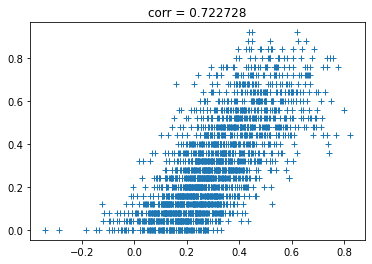

In [9]:
    test_corr = np.corrcoef(yLR,y)[0,1]
    plt.title('corr = %f'%test_corr)

    plt.plot(yLR,y,'+')

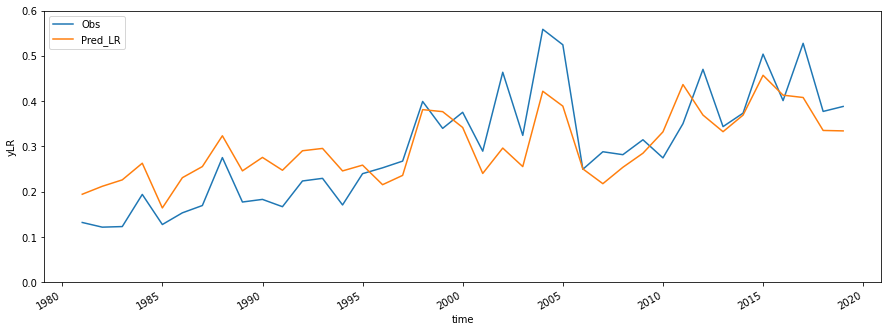

In [9]:


plt.figure(figsize=[15,5])
y.resample(time='1Y').mean().plot(label='Obs')
y_predLin_ds.resample(time='1Y').mean().yLR.plot(label='Pred_LR')
#dump(y,'TS1dataObs_1.joblib')
plt.ylim(0, 0.6)
plt.legend()
